In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Import data
# from google.colab import files
# uploaded = files.upload()

In [3]:
baseball_df = pd.read_csv('salary_batting_fielding_pitching_people_2015.csv')
baseball_df.head()

,uniqueid,yearid,battingyearid,teamid,lgid,playerid,salary,games,bats,runs,...,namelast,namegiven,weight,height,bats_hand,throws_hand,debut,finalgame,retroid,bbrefid
0,2015OAKabadfe01,2015,2014,OAK,AL,abadfe01,1087500,69,0,0,...,Abad,Fernando Antonio,235,74,L,L,2010-07-28,2021-10-01,abadf001,abadfe01
1,2015CLEadamsau01,2015,2014,CLE,AL,adamsau01,507700,6,0,0,...,Adams,Austin David,205,71,R,R,2014-07-12,2019-07-06,adama001,adamsau01
2,2015SFNaffelje01,2015,2014,SFN,NL,affelje01,6000000,62,0,0,...,Affeldt,Jeremy David,225,76,L,L,2002-04-06,2015-10-04,affej001,affelje01
3,2015MIAalvarhe01,2015,2014,MIA,NL,alvarhe01,4000000,30,57,2,...,Alvarez,Henderson Javier,205,72,R,R,2011-08-10,2017-09-30,alvah001,alvarhe01
4,2015ARIanderch01,2015,2014,ARI,NL,anderch01,512500,22,34,0,...,Anderson,Robert Chase,210,73,R,R,2014-05-11,2021-08-04,andec001,anderch01


In [4]:
# Generate our categorical variable list
baseball_cat = baseball_df.dtypes[baseball_df.dtypes == "object"].index.tolist()

# Check the number of unique values in each column
baseball_df[baseball_cat].nunique()

uniqueid        593
teamid           30
lgid              2
playerid        593
birthcountry     17
birthstate      107
birthcity       401
deathcountry      2
deathstate        2
deathcity         2
namefirst       319
namelast        523
namegiven       572
bats_hand         3
throws_hand       2
debut           476
finalgame       278
retroid         593
bbrefid         593
dtype: int64

In [5]:
baseball_df.columns

Index(['uniqueid', 'yearid', 'battingyearid', 'teamid', 'lgid', 'playerid',
       'salary', 'games', 'bats', 'runs', 'hits', 'doubles', 'triples',
       'homeruns', 'rbi', 'stolen_bases', 'caught_stealing', 'walks',
       'batting_strike_outs', 'international_walks', 'hit_by_pitch',
       'sacrifice_bunt', 'sacrifice_flies', 'hit_into_double_plays',
       'fielding_position', 'innouts', 'assists', 'errors', 'double_plays',
       'wins', 'losses', 'shutouts', 'saves', 'innings_pitched_outs',
       'hits_allowed', 'earned_runs', 'homeruns_allowed', 'walks_allowed',
       'pitching_strike_outs', 'baopp', 'era', 'wild_pitches', 'hit_batters',
       'balks', 'batters_facing_pitcher', 'games_finished', 'runs_allowed',
       'sh', 'sf', 'ground_outs_induced_doubleplays', 'birthyear',
       'birthmonth', 'birthday', 'birthcountry', 'birthstate', 'birthcity',
       'deathyear', 'deathmonth', 'deathday', 'deathcountry', 'deathstate',
       'deathcity', 'namefirst', 'namelast', 'name

In [6]:
baseball_df.isnull().values.any()

True

In [7]:
baseball_df.isnull().sum()

uniqueid         0
yearid           0
battingyearid    0
teamid           0
lgid             0
                ..
throws_hand      0
debut            0
finalgame        0
retroid          0
bbrefid          0
Length: 73, dtype: int64

In [8]:
# baseball_df = baseball_df[["salary", "games", "runs", "hits"]]
baseball_df = baseball_df[['salary','games','fielding_position','bats','runs','rbi', 'hits', 'doubles', 'triples', 'homeruns', 'walks', 'batting_strike_outs', 'innouts', 'pitching_strike_outs', 'era', 'wins', 'losses', 'hits_allowed', 'homeruns_allowed', 'walks_allowed','saves', 'weight','height']]
baseball_df.columns

Index(['salary', 'games', 'fielding_position', 'bats', 'runs', 'rbi', 'hits',
       'doubles', 'triples', 'homeruns', 'walks', 'batting_strike_outs',
       'innouts', 'pitching_strike_outs', 'era', 'wins', 'losses',
       'hits_allowed', 'homeruns_allowed', 'walks_allowed', 'saves', 'weight',
       'height'],
      dtype='object')

In [9]:
baseball_df.isnull().sum()

salary                    0
games                     0
fielding_position         0
bats                      0
runs                      0
rbi                       0
hits                      0
doubles                   0
triples                   0
homeruns                  0
walks                     0
batting_strike_outs       0
innouts                   0
pitching_strike_outs    472
era                     473
wins                    472
losses                  472
hits_allowed            472
homeruns_allowed        472
walks_allowed           472
saves                   472
weight                    0
height                    0
dtype: int64

In [14]:
baseball_df=baseball_df[['salary','games','fielding_position','bats','runs','rbi', 'hits', 'doubles', 'triples', 'homeruns', 'walks', 'batting_strike_outs', 'innouts', 'pitching_strike_outs', 'era', 'wins', 'losses', 'hits_allowed', 'homeruns_allowed', 'walks_allowed','saves', 'weight','height']].fillna(0)

In [15]:
baseball_df.isnull().sum()

salary                  0
games                   0
fielding_position       0
bats                    0
runs                    0
rbi                     0
hits                    0
doubles                 0
triples                 0
homeruns                0
walks                   0
batting_strike_outs     0
innouts                 0
pitching_strike_outs    0
era                     0
wins                    0
losses                  0
hits_allowed            0
homeruns_allowed        0
walks_allowed           0
saves                   0
weight                  0
height                  0
dtype: int64

In [16]:
# Remove salary target from features data
y = baseball_df.salary
X = baseball_df.drop(columns=["salary"])
# X = baseball_df.columns=("games", "runs", "hits") 


In [17]:
print(y.shape)
print(X.shape)

(782,)
(782, 22)


In [18]:
# Split training/test datasets
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

In [19]:
# Create a StandardScaler instance
scaler = StandardScaler()

In [20]:
# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

In [21]:
# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [22]:
# Added from the Module that compared RandomForest with Deep Learning
from sklearn.metrics import accuracy_score
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test_scaled)
print(f" Random forest predictive accuracy: {accuracy_score(y_test,y_pred):.3f}")

 Random forest predictive accuracy: 0.321


In [23]:
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 1.0
Testing Score: 0.32142857142857145


[0.08070491 0.02209224 0.06903506 0.05451353 0.05770563 0.06016223
 0.04934833 0.03115641 0.0419571  0.0571436  0.06484607 0.0654302
 0.03087845 0.03194457 0.02230985 0.0214921  0.0334511  0.02429514
 0.02965062 0.01194782 0.07599314 0.0639419 ]


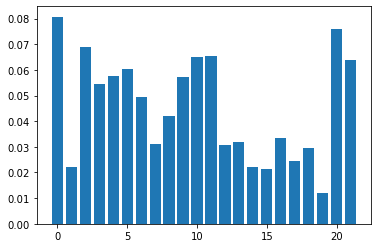

In [24]:
features = clf.feature_importances_
print(features)
plt.bar(x = range(len(features)), height=features)
plt.show()

In [ ]:
from sklearn.feature_selection import SelectFromModel

In [ ]:
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(clf)
sel.fit(X_train_scaled, y_train)
sel.get_support()

In [ ]:
X_selected_train, X_selected_test, y_train, y_test = train_test_split(sel.transform(X), y, random_state=1)
scaler = StandardScaler().fit(X_selected_train)
X_selected_train_scaled = scaler.transform(X_selected_train)
X_selected_test_scaled = scaler.transform(X_selected_test)

In [ ]:
clf = LogisticRegression().fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

In [ ]:
clf = LogisticRegression()
clf.fit(X_selected_train_scaled, y_train)
print(f'Training Score: {clf.score(X_selected_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_selected_test_scaled, y_test)}')

In [ ]:
# Added from the Module that compared RandomForest with Deep Learning
import tensorflow as tf
# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 24
hidden_nodes_layer2 = 2512

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))


# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Compile the Sequential model together and customize metrics
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=50)

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")